In [1]:
import numpy as np
import h5py
filepath='./wlan_train_set_joint_v3.mat'
f=h5py.File(filepath,'r')
train_data=np.array(f['Train_data'][:])
time_label=np.array(f['Train_timing_label_onehot'][:])
cfo_label=np.array(f['Train_cfo_label'][:])/1e3



Using TensorFlow backend.



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 11, 864, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 11, 864, 32)  384         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 11, 216, 32)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 11, 216, 64)  22592       max_pooling2d_1[0][0]            
___________________________________________________________________________________________

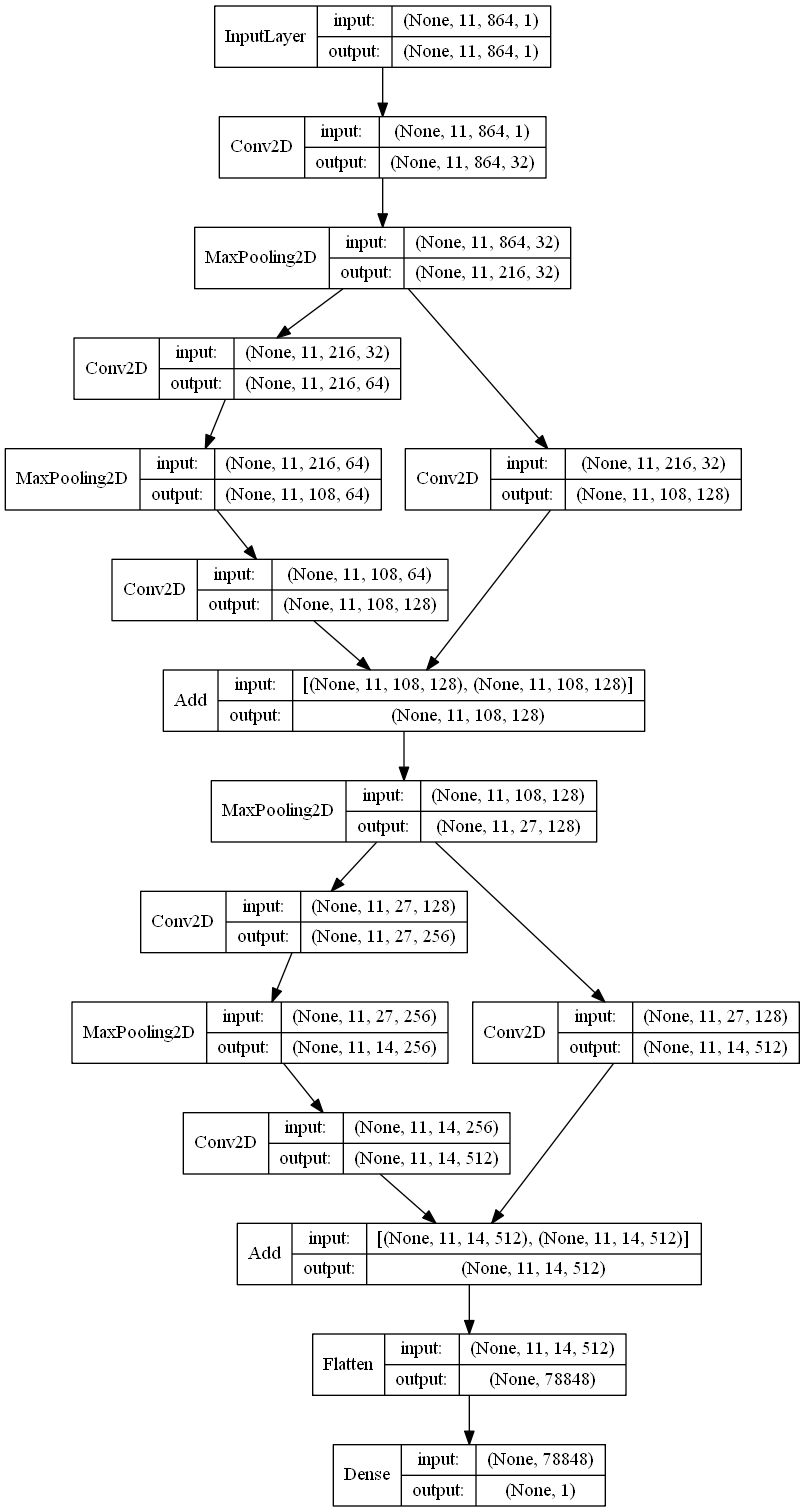

In [2]:
from keras.models import Model
from keras import models
from keras import layers
from keras import Input
from keras import optimizers
from keras.layers import Dropout
from keras.layers import BatchNormalization
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

input_data=Input(shape=(11,864,1))
x=layers.Conv2D(32,(11,1),padding='same',activation='relu',kernel_initializer='he_normal')(input_data)
x=layers.MaxPooling2D((1,4),padding='same')(x)

x_skip1=layers.Conv2D(128,(1,1),strides=(1,2),padding='same',activation='relu',kernel_initializer='he_normal')(x)

x=layers.Conv2D(64,(11,1),padding='same',activation='relu',kernel_initializer='he_normal')(x)
x=layers.MaxPooling2D((1,2),padding='same')(x)
x=layers.Conv2D(128,(11,1),padding='same',activation='relu',kernel_initializer='he_normal')(x)
x=layers.add([x_skip1,x])

x=layers.MaxPooling2D((1,4),padding='same')(x)

x_skip2=layers.Conv2D(512,(1,1),strides=(1,2),padding='same',activation='relu',kernel_initializer='he_normal')(x)

x=layers.Conv2D(256,(11,1),padding='same',activation='relu',kernel_initializer='he_normal')(x)
x=layers.MaxPooling2D((1,2),padding='same')(x)
x=layers.Conv2D(512,(11,1),padding='same',activation='relu',kernel_initializer='he_normal')(x)
x=layers.add([x_skip2,x])

x=layers.Flatten()(x)
#x=layers.Dense(512,activation='relu',kernel_initializer='he_normal')(x)
x=layers.Dense(1,name='cfo')(x)


model= Model(input_data,x)

model.summary()
plot_model(model,to_file='network1.png',show_shapes=True,show_layer_names=False)

In [3]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
                loss={'cfo':'mse'},
                loss_weights={'cfo':1},
                metrics={'cfo':'mse'})


In [6]:
SNR=range(-15,19)
for n in range(8):
    model.fit(train_data,{'cfo':cfo_label},epochs=10,batch_size=50)
    mse_buf=[]
    for SNR_loop in SNR:
        filepath='./wlan_test_set_joint_SNR(%d)_v3.mat' % SNR_loop
        f=h5py.File(filepath,'r')
        test_data=np.array(f['Test_data'][:])
        test_time_label=np.array(f['Test_timing_label_onehot'][:])
        test_cfo_label=np.array(f['Test_cfo_label'][:])/1e3
        a=model.evaluate(test_data, [test_cfo_label],batch_size=500)
        mse_buf.append(a[1])
    print(mse_buf)

Epoch 1/10
100000/100000 [==============================] - 70s 705us/step - loss: 1.9794 - mse: 1.9794
Epoch 2/10
100000/100000 [==============================] - 70s 701us/step - loss: 1.9826 - mse: 1.9826
Epoch 3/10
100000/100000 [==============================] - 72s 718us/step - loss: 1.9608 - mse: 1.9608
Epoch 4/10
100000/100000 [==============================] - 70s 701us/step - loss: 1.9304 - mse: 1.9304
Epoch 5/10
100000/100000 [==============================] - 70s 702us/step - loss: 1.9398 - mse: 1.9398
Epoch 6/10
100000/100000 [==============================] - 71s 710us/step - loss: 1.9244 - mse: 1.9244
Epoch 7/10
100000/100000 [==============================] - 69s 695us/step - loss: 1.9853 - mse: 1.9853
Epoch 8/10
100000/100000 [==============================] - 69s 695us/step - loss: 1.9172 - mse: 1.9172
Epoch 9/10
100000/100000 [==============================] - 70s 700us/step - loss: 1.9097 - mse: 1.9097
Epoch 10/10
10000/10000 [==============================] - 2s 22

100000/100000 [==============================] - 71s 709us/step - loss: 1.8215 - mse: 1.8215
Epoch 8/10
100000/100000 [==============================] - 70s 699us/step - loss: 1.7999 - mse: 1.7999
Epoch 9/10
100000/100000 [==============================] - 69s 693us/step - loss: 1.7964 - mse: 1.7964
Epoch 10/10
10000/10000 [==============================] - 2s 228us/step
[6460.578125, 4082.67431640625, 2258.53515625, 1181.7906494140625, 470.3077392578125, 238.81356811523438, 133.23599243164062, 88.21966552734375, 65.68143463134766, 51.29841613769531, 39.95341873168945, 30.165512084960938, 23.55890464782715, 17.944231033325195, 14.094719886779785, 10.772629737854004, 8.121818542480469, 6.774835109710693, 5.173402309417725, 4.035124778747559, 3.2334346771240234, 2.623150110244751, 2.1155452728271484, 1.7586272954940796, 1.4992516040802002, 1.2835625410079956, 1.0889830589294434, 0.9682222604751587, 0.8399233222007751, 0.7461910843849182, 0.6631535291671753, 0.6346672773361206, 0.59930109

10000/10000 [==============================] - 2s 218us/step
[6545.24365234375, 4114.4326171875, 2239.64111328125, 1175.34814453125, 463.677490234375, 238.35780334472656, 133.15374755859375, 89.01512145996094, 65.91494750976562, 51.3727912902832, 39.464351654052734, 30.213159561157227, 23.392297744750977, 17.872976303100586, 14.296287536621094, 10.826220512390137, 8.171545028686523, 6.786052227020264, 5.222146987915039, 4.037970066070557, 3.2804293632507324, 2.6582071781158447, 2.0987942218780518, 1.693009376525879, 1.4909290075302124, 1.2449959516525269, 1.0521570444107056, 0.9116806387901306, 0.7879205942153931, 0.7003989815711975, 0.6223840117454529, 0.582413375377655, 0.5485965609550476, 0.48757100105285645]
Epoch 1/10
100000/100000 [==============================] - 68s 681us/step - loss: 1.6692 - mse: 1.6692
Epoch 2/10
100000/100000 [==============================] - 69s 691us/step - loss: 1.6862 - mse: 1.6862
Epoch 3/10
100000/100000 [==============================] - 68s 684us/

10000/10000 [==============================] - 2s 219us/step
[6490.71630859375, 4096.6123046875, 2259.31005859375, 1187.2100830078125, 471.1861877441406, 238.9127960205078, 133.38467407226562, 87.9407730102539, 65.79998779296875, 50.928993225097656, 38.95466232299805, 29.354368209838867, 22.9595890045166, 17.32136344909668, 13.745366096496582, 10.66956615447998, 7.978591442108154, 6.486272811889648, 5.057805061340332, 3.809234857559204, 3.0604443550109863, 2.5281922817230225, 1.9908671379089355, 1.614357829093933, 1.3668428659439087, 1.1443887948989868, 0.9438514709472656, 0.8263799548149109, 0.7320318818092346, 0.6398969292640686, 0.5738542675971985, 0.5120478272438049, 0.48688480257987976, 0.44096654653549194]
Epoch 1/10
100000/100000 [==============================] - 70s 695us/step - loss: 1.5920 - mse: 1.5920
Epoch 2/10
100000/100000 [==============================] - 70s 697us/step - loss: 1.5762 - mse: 1.5762
Epoch 3/10
100000/100000 [==============================] - 70s 701us/

In [14]:

mse_buf=[]
for SNR_loop in SNR:
    filepath='./wlan_test_set_joint_SNR(%d)_v3.mat' % SNR_loop
    f=h5py.File(filepath,'r')
    test_data=np.array(f['Test_data'][:])
    test_time_label=np.array(f['Test_timing_label_onehot'][:])
    test_cfo_label=np.array(f['Test_cfo_label'][:])/1e3
    a=model.evaluate(test_data, [test_cfo_label],batch_size=500)
    mse_buf.append(a[1])
print(mse_buf)

10000/10000 [==============================] - 4s 410us/step
8055.37939453125
10000/10000 [==============================] - 4s 402us/step
1506.395751953125
10000/10000 [==============================] - 4s 402us/step
165.85968017578125
10000/10000 [==============================] - 4s 402us/step
58.62126922607422
10000/10000 [==============================] - 4s 402us/step
24.7099666595459
10000/10000 [==============================] - 4s 403us/step
11.603652000427246
10000/10000 [==============================] - 4s 402us/step
6.2201948165893555
10000/10000 [==============================] - 4s 406us/step
3.7560501098632812
10000/10000 [==============================] - 4s 403us/step
2.668088436126709
10000/10000 [==============================] - 4s 402us/step
2.1455647945404053
10000/10000 [==============================] - 4s 402us/step
1.8021081686019897
10000/10000 [==============================] - 4s 402us/step
1.677899956703186


In [12]:
mse_buf

[6091.2255859375,
 1033.2447509765625,
 121.36781311035156,
 49.77877426147461,
 21.42698860168457,
 9.446786880493164,
 4.6168928146362305,
 2.479363203048706,
 1.4874277114868164,
 1.023850917816162,
 0.753438413143158,
 0.6465596556663513]